 # Importing data and libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [3]:
df =pd.read_excel("hr-data.xlsx")

# Data Wrangling

In [4]:
df.head()

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance
0,Barr Faughny,AC0001,Male,Bachelor's Degree,2020-06-12,Chocolatier,51300,26.0,13
1,Dennison Crosswaite,AC0002,Female,Diploma,2021-02-18,Production Operator,38300,32.7,12
2,Gunar Cockshoot,AC0003,Male,High School Diploma,2022-09-05,Packaging Associate,31400,34.3,16
3,Wilone O'Kielt,AC0004,Female,Bachelor's Degree,2019-11-20,Marketing Specialist,60700,29.6,21
4,Gigi Bohling,AC0005,Male,Master's Degree,2018-04-08,Research Scientist,77300,30.3,23


In [5]:
# Check some information about columns dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Name                     161 non-null    object        
 1   Emp ID                   161 non-null    object        
 2   Gender                   161 non-null    object        
 3   Education Qualification  161 non-null    object        
 4   Date of Join             161 non-null    datetime64[ns]
 5   Job Title                161 non-null    object        
 6   Salary                   161 non-null    int64         
 7   Age                      161 non-null    float64       
 8   Leave Balance            161 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 11.4+ KB


In [6]:
# Check some matmatical information
df.describe()

,Salary,Age,Leave Balance
count,161.000000,161.000000,161.000000
mean,54231.055901,35.204969,16.416149
std,16635.602769,8.602309,4.980661
min,28900.000000,23.500000,2.000000
25%,39700.000000,30.700000,14.000000
50%,51100.000000,32.700000,16.000000
75%,70800.000000,35.900000,20.000000
max,85000.000000,66.700000,37.000000


In [7]:
print("The number of row in the dataset is" ,df.shape[0])

The number of row in the dataset is 161


In [8]:
print("The number of Columns in the dataset is" ,df.shape[1])

The number of Columns in the dataset is 9


In [9]:
# Check The data types of the columns
df.dtypes

Name                               object
Emp ID                             object
Gender                             object
Education Qualification            object
Date of Join               datetime64[ns]
Job Title                          object
Salary                              int64
Age                               float64
Leave Balance                       int64
dtype: object

In [10]:
# Kmow the Education Qualification and Job Title categories
for column in df[["Education Qualification","Job Title"]]:
 print(f'{column}: {df[column].unique()}\n')

Education Qualification: ["Bachelor's Degree" 'Diploma' 'High School Diploma' "Master's Degree"]

Job Title: ['Chocolatier' 'Production Operator' 'Packaging Associate'
 'Marketing Specialist' 'Research Scientist' 'Sales Representative'
 'Quality Control' 'Research Analyst' 'Product Manager'
 'Marketing Manager']



In [11]:
# Check for null values
df.isnull().sum()

Name                       0
Emp ID                     0
Gender                     0
Education Qualification    0
Date of Join               0
Job Title                  0
Salary                     0
Age                        0
Leave Balance              0
dtype: int64

In [12]:
# Check for duplicated values
df.duplicated().sum()

0

In [13]:
# Check for duplicated values in name column
df["Name"].duplicated().sum()

13

In [14]:
df[df["Name"].duplicated()]

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance
67,Mollie Hanway,AC0068,Female,Diploma,2021-06-29,Sales Representative,47800,27.7,19
130,Dev Joshi,AC0131,Male,Bachelor's Degree,2019-12-23,Chocolatier,51100,33.7,16
147,Zara Verma,AC0148,Female,Diploma,2019-07-27,Product Manager,82400,33.8,14
149,Pari Gupta,AC0150,Female,Master's Degree,2020-05-13,Marketing Specialist,61200,44.1,14
150,Aanya Singh,AC0151,Female,High School Diploma,2019-08-06,Research Scientist,78200,27.6,21
151,Kiara Bhatia,AC0152,Female,Diploma,2023-03-01,Sales Representative,48100,37.2,16
152,Reyansh Rana,AC0153,Male,Bachelor's Degree,2021-05-25,Quality Control,44000,30.9,15
154,Avani Iyer,AC0155,Female,Diploma,2019-12-10,Production Operator,37400,46.2,20
155,Kiaan Shah,AC0156,Male,Bachelor's Degree,2018-11-03,Research Analyst,57100,33.9,16
157,Anaya Agarwal,AC0158,Female,High School Diploma,2023-04-09,Chocolatier,52900,30.5,8


In [15]:
# Check The duplicated names
Name=df[df["Name"].duplicated()]
Name['Name'].values
df.loc[df['Name'].isin(Name['Name'].values)]

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance
45,Mollie Hanway,AC0046,Male,Bachelor's Degree,2021-10-31,Chocolatier,52500,55.9,16
67,Mollie Hanway,AC0068,Female,Diploma,2021-06-29,Sales Representative,47800,27.7,19
94,Dev Joshi,AC0095,Male,Master's Degree,2018-12-10,Chocolatier,51100,36.2,15
111,Zara Verma,AC0112,Female,Diploma,2020-10-24,Product Manager,81400,35.2,19
114,Aanya Singh,AC0115,Female,High School Diploma,2021-11-29,Research Scientist,77100,31.7,9
130,Dev Joshi,AC0131,Male,Bachelor's Degree,2019-12-23,Chocolatier,51100,33.7,16
131,Pari Gupta,AC0132,Female,Master's Degree,2018-09-16,Marketing Specialist,62900,36.8,15
133,Kiara Bhatia,AC0134,Female,Diploma,2021-06-22,Sales Representative,47000,32.3,22
134,Reyansh Rana,AC0135,Male,Bachelor's Degree,2020-09-15,Quality Control,42400,66.2,19
136,Avani Iyer,AC0137,Female,Diploma,2023-01-12,Production Operator,36000,31.0,18


In [16]:
# Check if there's duolicated values in Emp ID Column
df['Emp ID'].duplicated().sum()

0

In [17]:
# Check The age column for unnatural data
df.query('Age < 0')

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance


In [18]:
df[df['Age'] > 60]

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance
24,Camilla Castle,AC0025,Female,High School Diploma,2023-02-12,Packaging Associate,32500,63.7,12
46,Hoyt D'Alesco,AC0047,Female,Master's Degree,2018-08-14,Marketing Manager,73500,62.6,23
66,Constantino Espley,AC0067,Female,Bachelor's Degree,2022-02-15,Research Scientist,76300,65.4,16
81,Bili Sizey,AC0082,Female,Diploma,2022-03-09,Product Manager,81600,61.7,6
86,Kellsie Waby,AC0087,Male,Bachelor's Degree,2021-02-03,Quality Control,43000,60.8,24
120,Aarav Verma,AC0121,Male,Master's Degree,2017-05-11,Product Manager,85000,65.1,5
134,Reyansh Rana,AC0135,Male,Bachelor's Degree,2020-09-15,Quality Control,42400,66.2,19
135,Lindt Truffle,AC0136,Female,High School Diploma,2019-11-28,Packaging Associate,33800,66.7,8
146,Anika Joshi,AC0147,Female,High School Diploma,2020-02-03,Research Analyst,59500,61.1,18


In [19]:
# 15 : 24 youth
# 25 : 64 adults
# 65 : 115 seniors
df['Age_Category'] = pd.cut(x = df['Age'], bins=[14, 24 , 64, 115],labels=['Youth', 'Adults','Seniors'])

# Exploratory Data Analysis

In [20]:
df["Gender"].value_counts()

Female    88
Male      73
Name: Gender, dtype: int64

In [21]:
df["Education Qualification"].value_counts()

Bachelor's Degree      49
High School Diploma    42
Diploma                41
Master's Degree        29
Name: Education Qualification, dtype: int64

In [22]:
df["Job Title"].value_counts()

Packaging Associate     22
Production Operator     20
Sales Representative    18
Chocolatier             17
Quality Control         17
Research Analyst        16
Product Manager         16
Research Scientist      15
Marketing Specialist    10
Marketing Manager       10
Name: Job Title, dtype: int64

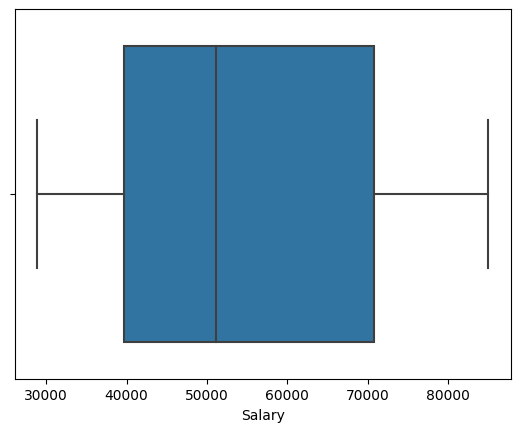

In [23]:
# Check if there are salary values within a dataset that vary greatly from the others
sns.boxplot(x=df['Salary'])
plt.show()

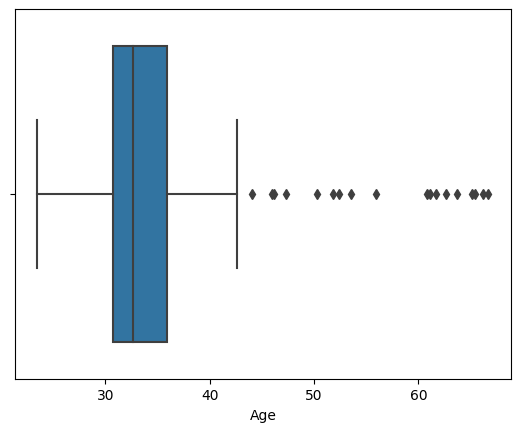

In [24]:
# we can see that some ages in the dataset lie outside the range of most of the others ages
sns.boxplot(x=df['Age'])
plt.show()

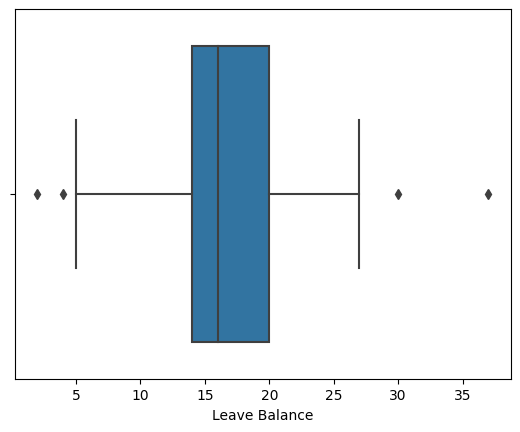

In [25]:
sns.boxplot(x=df['Leave Balance'])
plt.show()

In [26]:
# Detect outlier datapoint
Q1 = df['Leave Balance'].quantile(0.25)
Q3 = df['Leave Balance'].quantile(0.75)
IQR = Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,' and The interquartile range is',IQR)
# It's an outlier if it is less than: Q1 - 1.5 * IQR. or if it is greater than: Q3 + 1.5 * IQR
print('Number of Outliers below:',df['Leave Balance'].lt(Q1 - 1.5*IQR).sum())
print('Number of Outliers above:',df['Leave Balance'].gt(Q3 + 1.5*IQR).sum())

The middle quartiles for ConvertedComp range from 14.0 to 20.0  and The interquartile range is 6.0
Number of Outliers below: 2
Number of Outliers above: 2


In [27]:
# The least Two employees who took Leave Balance that detected as outliers
Least_Leave_Balance=df[df['Leave Balance'].lt(Q1 - 1.5*IQR)]
Least_Leave_Balance

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance,Age_Category
58,Hinda Label,AC0059,Female,Diploma,2023-06-22,Quality Control,43000,33.6,4,Adults
125,Rhea Bhatia,AC0126,Female,Diploma,2021-07-29,Quality Control,45000,36.3,2,Adults


In [28]:
# The Most Two employees who took Leave Balance that detected as outliers
Most_Leave_Balance=df[df['Leave Balance'].gt(Q3 + 1.5*IQR)]
Most_Leave_Balance

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance,Age_Category
53,Allene Gobbet,AC0054,Male,Diploma,2022-12-31,Packaging Associate,29000,30.4,30,Adults
144,Advait Kapoor,AC0145,Male,Bachelor's Degree,2019-11-17,Packaging Associate,32600,28.6,37,Adults


In [29]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR= Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,'and The interquartile range is',IQR)
# It's an outlier if it is less than: Q1 - 1.5 * IQR. or if it is greater than: Q3 + 1.5 * IQR
print('Number of Outliers below:',df["Age"].lt(Q1 - 1.5 * IQR).sum())
print('Number of Outliers above:',df["Age"].gt(Q3 + 1.5 * IQR).sum())

The middle quartiles for ConvertedComp range from 30.7 to 35.9 and The interquartile range is 5.199999999999999
Number of Outliers below: 0
Number of Outliers above: 18


In [30]:
# Check the data points that are considered outliers
df[df["Age"].gt(Q3 + 1.5 * IQR)]

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance,Age_Category
13,Dotty Strutley,AC0014,Female,Master's Degree,2018-09-12,Marketing Manager,74700,52.4,10,Adults
24,Camilla Castle,AC0025,Female,High School Diploma,2023-02-12,Packaging Associate,32500,63.7,12,Adults
45,Mollie Hanway,AC0046,Male,Bachelor's Degree,2021-10-31,Chocolatier,52500,55.9,16,Adults
46,Hoyt D'Alesco,AC0047,Female,Master's Degree,2018-08-14,Marketing Manager,73500,62.6,23,Adults
50,Kissiah Maydway,AC0051,Female,Bachelor's Degree,2020-09-08,Sales Representative,46000,53.5,15,Adults
66,Constantino Espley,AC0067,Female,Bachelor's Degree,2022-02-15,Research Scientist,76300,65.4,16,Seniors
69,Bev Lashley,AC0070,Female,High School Diploma,2023-01-12,Packaging Associate,33600,46.0,16,Adults
81,Bili Sizey,AC0082,Female,Diploma,2022-03-09,Product Manager,81600,61.7,6,Adults
85,Collin Jagson,AC0086,Female,Diploma,2020-05-10,Sales Representative,49800,50.3,15,Adults
86,Kellsie Waby,AC0087,Male,Bachelor's Degree,2021-02-03,Quality Control,43000,60.8,24,Adults


In [31]:
Q1 = df['Leave Balance'].quantile(0.25)
Q3 = df['Leave Balance'].quantile(0.75)
IQR = Q3 - Q1
df1=df[df["Leave Balance"].le(Q3 + 1.5 * IQR)] # Remove above outlier
df1=df1[df1["Leave Balance"].ge(Q1 - 1.5 * IQR)] # Remove below outlier

In [32]:
df1.shape

(157, 10)

In [33]:
df['Age_Category'].value_counts()

Adults     156
Seniors      4
Youth        1
Name: Age_Category, dtype: int64

In [34]:
# +1 > Perfect Positive correlation and association
# +0.8 to +1 > very strong and association
# +0.6 to 0.8 > strong and association
# +0.4 to 0.6 > Moderate and association
# +0.2 to 0.4 > weak + or no association
# 0.0 to +0.2 > very weak + or no association
# 0.0 to -0.2 > very weak - or no association
# -0.2 to -0.4 > very weak - or no association
# -0.4 to -0.6 > Moderate - association
# -0.6 to -0.8 > strong - association
# -0.8 to -1 > very strong - association
# -1 > Perfect Negative correlation  association
df['Age'].corr(df['Salary'])

0.05059215221762517

# Data Visualization

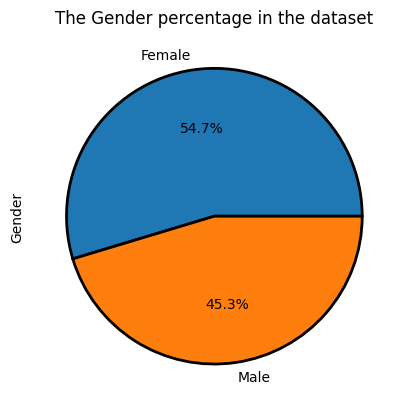

In [35]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = {"edgecolor":'black','linewidth': 2},ylabel='Gender',title='The Gender percentage in the dataset')
plt.show()

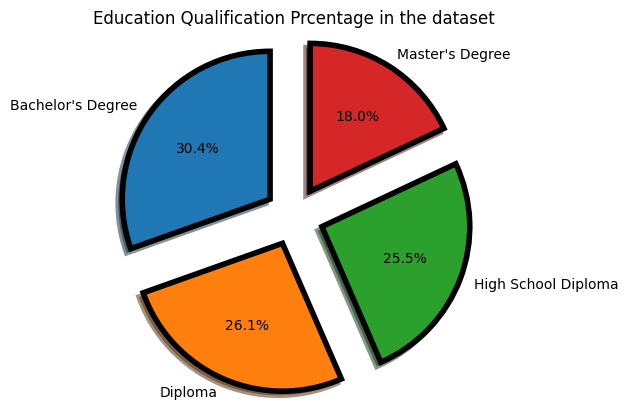

In [36]:
plt.pie(df['Education Qualification'].value_counts(), explode = (0.2, 0.2,0.2,0.2) ,labels = df['Education Qualification'].unique(),
        autopct = '%1.1f%%',shadow = True,
        startangle = 90,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 4})
plt.title('Education Qualification Prcentage in the dataset')
plt.show()

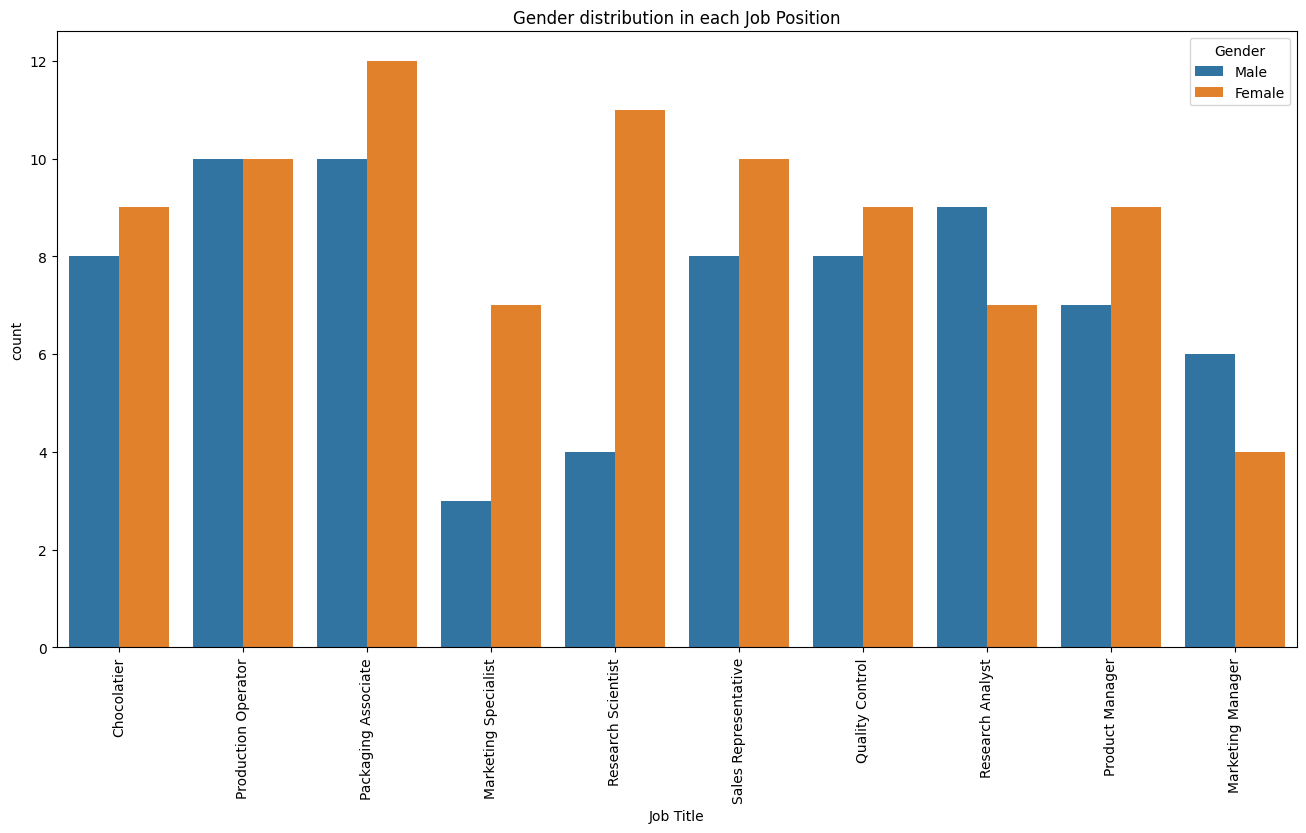

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['Job Title'],hue=df.Gender)
plt.xticks(rotation='vertical')
plt.title('Gender distribution in each Job Position')
plt.show()

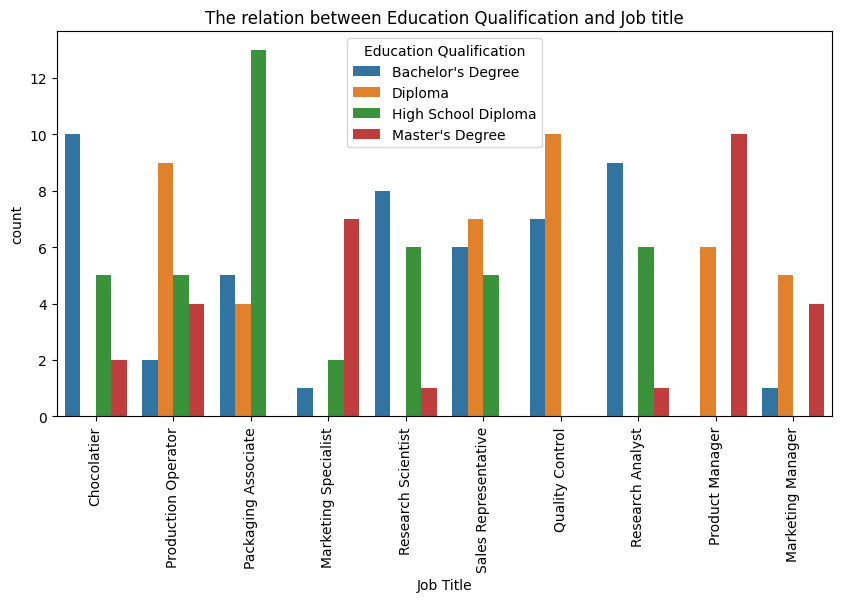

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(hue=df['Education Qualification'],x=df['Job Title'])
plt.xticks(rotation="vertical")
plt.title('The relation between Education Qualification and Job title')
plt.show()

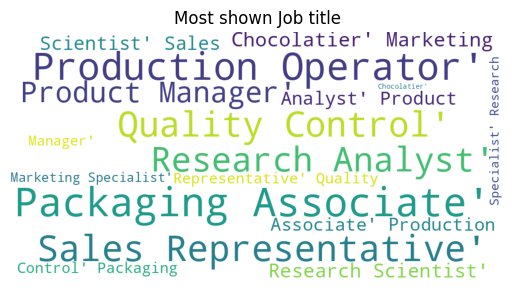

In [39]:
text = df['Job Title'].values
wordcloud = WordCloud(background_color='white',width = 1000, height = 500).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most shown Job title')
plt.show()

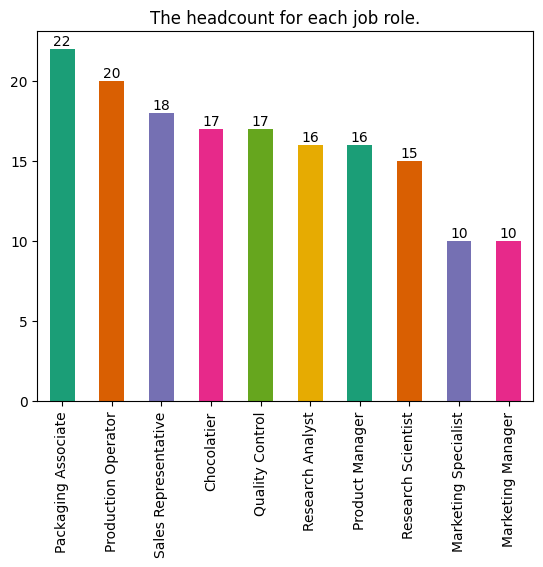

In [40]:
plots = df['Job Title'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.title('The headcount for each job role.')
plt.show()

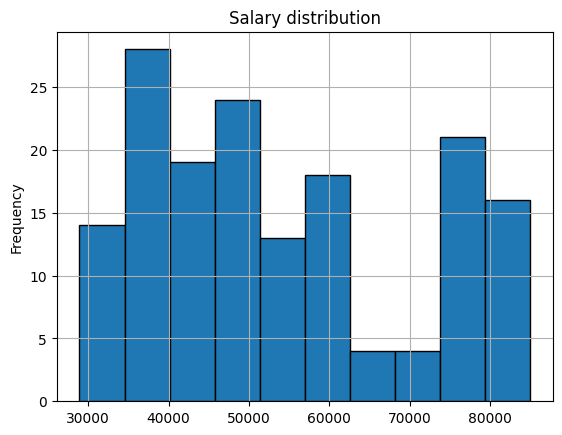

In [41]:
df['Salary'].plot(kind='hist', bins=10, title='Salary',grid=True,edgecolor='black')
plt.title('Salary distribution')
plt.show()

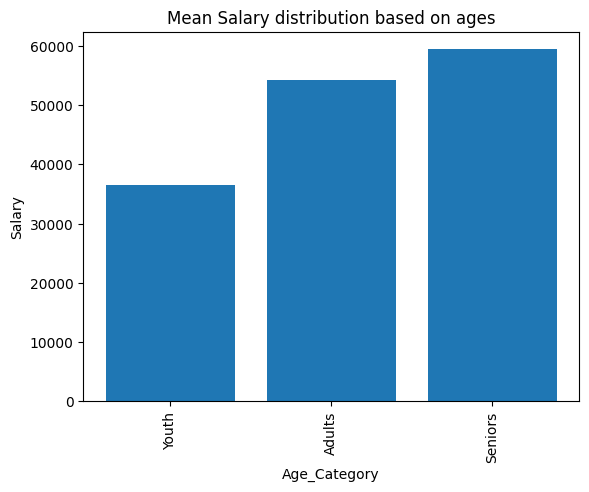

In [42]:
Avg_Salary=df.groupby('Age_Category')['Salary'].mean().reset_index()
plt.bar(Avg_Salary['Age_Category'],Avg_Salary['Salary'])
plt.xticks(rotation="vertical")
plt.xlabel("Age_Category")
plt.ylabel("Salary")
plt.title("Mean Salary distribution based on ages")
plt.show()

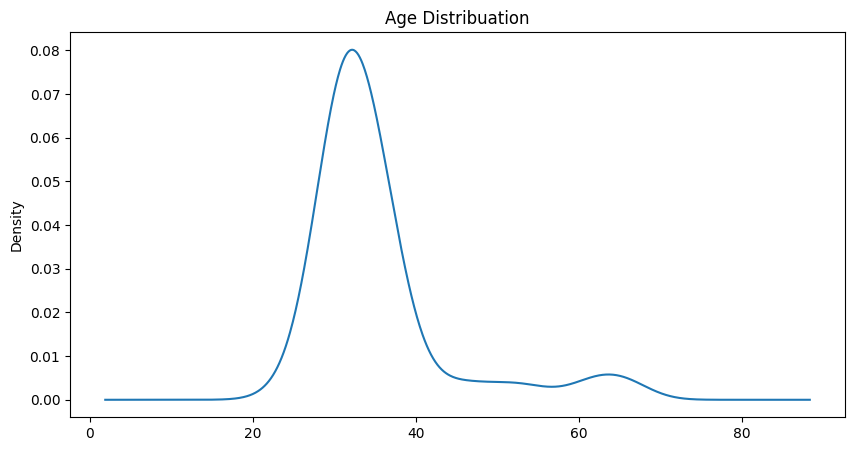

In [62]:
plt.figure(figsize=(10,5))
df['Age'].plot.kde()
plt.title("Age Distribuation")
plt.show()

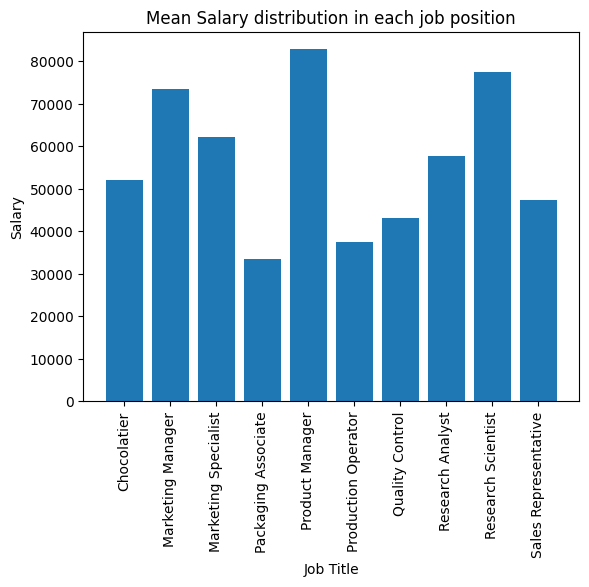

In [43]:
Avg_Salary=df.groupby('Job Title')['Salary'].mean().reset_index()
Avg_Salary
plt.bar(Avg_Salary['Job Title'],Avg_Salary['Salary'])
plt.xticks(rotation="vertical")
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.title("Mean Salary distribution in each job position")
plt.show()

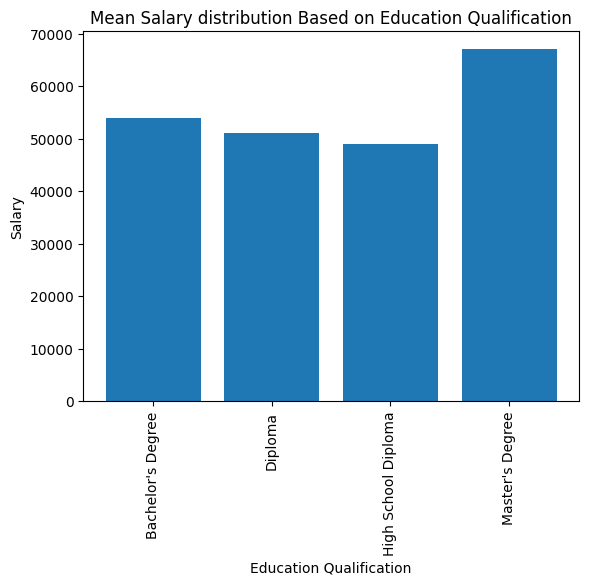

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance,Age_Category
144,Advait Kapoor,AC0145,Male,Bachelor's Degree,2019-11-17,Packaging Associate,32600,28.6,37,Adults
53,Allene Gobbet,AC0054,Male,Diploma,2022-12-31,Packaging Associate,29000,30.4,30,Adults
30,Gray Seamon,AC0031,Female,Bachelor's Degree,2018-07-27,Marketing Manager,74200,30.6,27,Adults
37,Valentia Etteridge,AC0038,Male,Diploma,2022-10-15,Packaging Associate,31900,29.6,25,Adults
12,Jan Morforth,AC0013,Male,Bachelor's Degree,2021-10-30,Chocolatier,52700,28.5,25,Adults


In [63]:
Avg_Salary=df.groupby('Education Qualification')['Salary'].mean().reset_index()
Avg_Salary
plt.bar(Avg_Salary['Education Qualification'],Avg_Salary['Salary'])
plt.xticks(rotation="vertical")
plt.xlabel('Education Qualification')
plt.ylabel("Salary")
plt.title("Mean Salary distribution Based on Education Qualification")
plt.show()

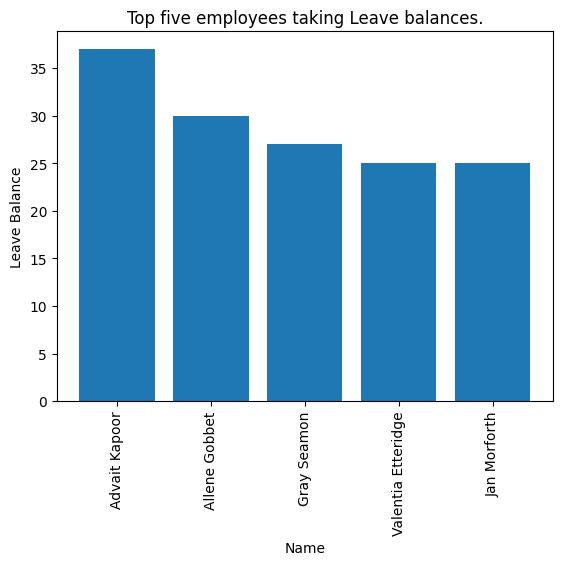

In [45]:
Top_Leave_Balance=df.sort_values('Leave Balance',ascending = False).head(5)
plt.bar(Top_Leave_Balance['Name'],Top_Leave_Balance['Leave Balance'])
plt.xticks(rotation="vertical")
plt.xlabel("Name")
plt.ylabel("Leave Balance")
plt.title("Top five employees taking Leave balances.")
plt.show()

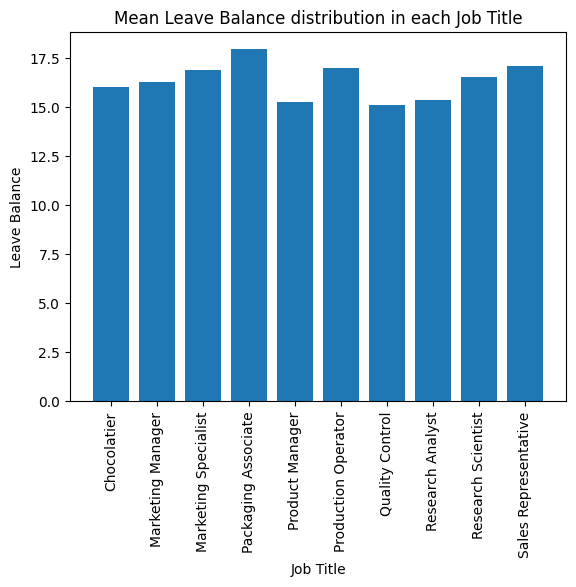

In [46]:
Avg_Salary=df.groupby('Job Title')['Leave Balance'].mean().reset_index()
Avg_Salary
plt.bar(Avg_Salary['Job Title'],Avg_Salary['Leave Balance'])
plt.xticks(rotation="vertical")
plt.xlabel('Job Title')
plt.ylabel("Leave Balance")
plt.title("Mean Leave Balance distribution in each Job Title")
plt.show()

In [47]:
Top_Salary=df.groupby('Job Title')['Salary'].nlargest(1).reset_index()
Name=df[['Date of Join','Name']].iloc[Top_Salary['level_1'].values].reset_index()
Top_Salary['Name']=Name['Name']
Top_Salary['Date of Join']=Name['Date of Join']
Top_Salary.drop(columns=['level_1'],inplace=True)
Top_Salary

,Job Title,Salary,Name,Date of Join
0,Chocolatier,54900,Bernie Gorges,2018-11-27
1,Marketing Manager,74900,Krish Trivedi,2020-07-09
2,Marketing Specialist,63600,Merrilee Plenty,2018-10-28
3,Packaging Associate,36200,Shari McNee,2019-09-14
4,Product Manager,85000,Aarav Verma,2017-05-11
5,Production Operator,39800,William Reeveley,2021-08-17
6,Quality Control,45000,Rhea Bhatia,2021-07-29
7,Research Analyst,60000,Niall Selesnick,2019-04-16
8,Research Scientist,79300,Dell Molloy,2021-09-29
9,Sales Representative,49800,Curtice Advani,2023-03-14


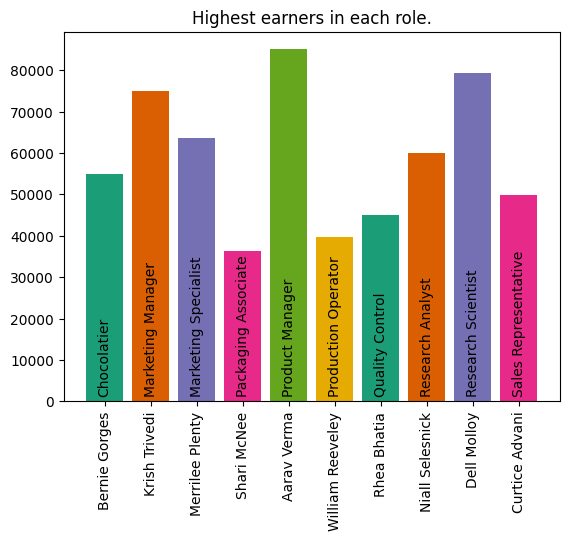

In [48]:
fig, ax = plt.subplots()
ax.bar(Top_Salary['Name'],Top_Salary['Salary'],label=Top_Salary['Job Title'],color=sns.palettes.mpl_palette('Dark2'))
for bar, state in zip(ax.patches, Top_Salary['Job Title']):
    ax.text(bar.get_x()+bar.get_width()/2, 2000, state, rotation=90, color = 'black', ha = 'center')
plt.xticks(rotation='vertical')
plt.title("Highest earners in each role.")
plt.show()

# Conclusions



*   The female worker Percentage in the data set is 54.7% Meanwhile The male worker Percentage is 45.3%
*   People with Bachelor's Degrees are the most shown in the dataset
*   Females are most shown in Research Scientist  and Marketing Specialist job roles Meanwhile Males are most shown in Packaging Associate
*   People with a Diploma Educational qualification are not likely to work in
Chocolatier , Marketing Specialist, Research Scientist, and Research Analyst job roles
*   The most 3 shown job roles in the dataset are Packaging Associate, Production Operator, and Sales Representative
*   Seniors are the most paid
*   People who work as Product Managers are the most paid Meanwhile  people who work as Packaging Associates are the least
*   People With  Bachelor's Degrees are the most paid
*   The top 3 employees taking Leave balances are Advait Kapoor with 37 Leave balances, Allene Gobbet with 30 Leave balances, and Gray Seamon with 27 Leave balances
*   The least Two employees who took Leave Balance that detected as outliers are Hinda Label and Rhea Bhatia
*   People who work in Packaging Associates are the most Taking leave balance Meanwhile  people who work as Quality Control  are the least
*   This Picture shows who takes the Highest salary in each role
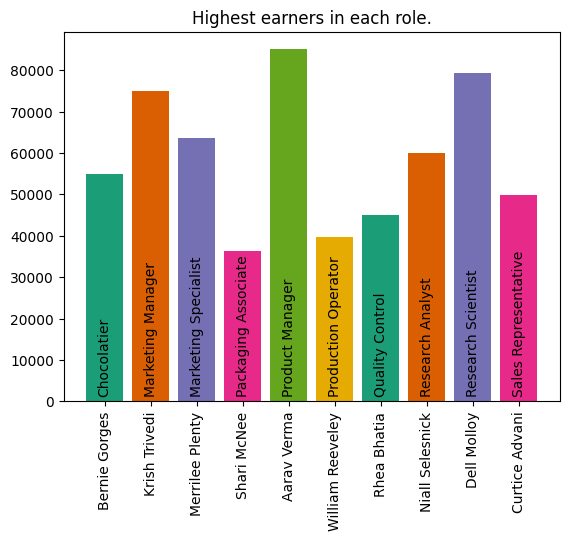
*     The age distribution in the data set is from 20 to 40



